<a href="https://colab.research.google.com/github/GautierHanna/Circle-and-NN/blob/master/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import optimizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Embedding, Activation, MaxPooling2D, Dropout
from keras.layers import Flatten, LSTM, ZeroPadding2D, BatchNormalization, MaxPooling2D

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [17]:
pip install PyQt5

     |████████████████████████████████| 62.2MB 418kB/s 
     |████████████████████████████████| 71kB 16.8MB/s 


Question 1: Use skimage to load your “iguana.jpg” and display it in your notebook.

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf32256d30>)

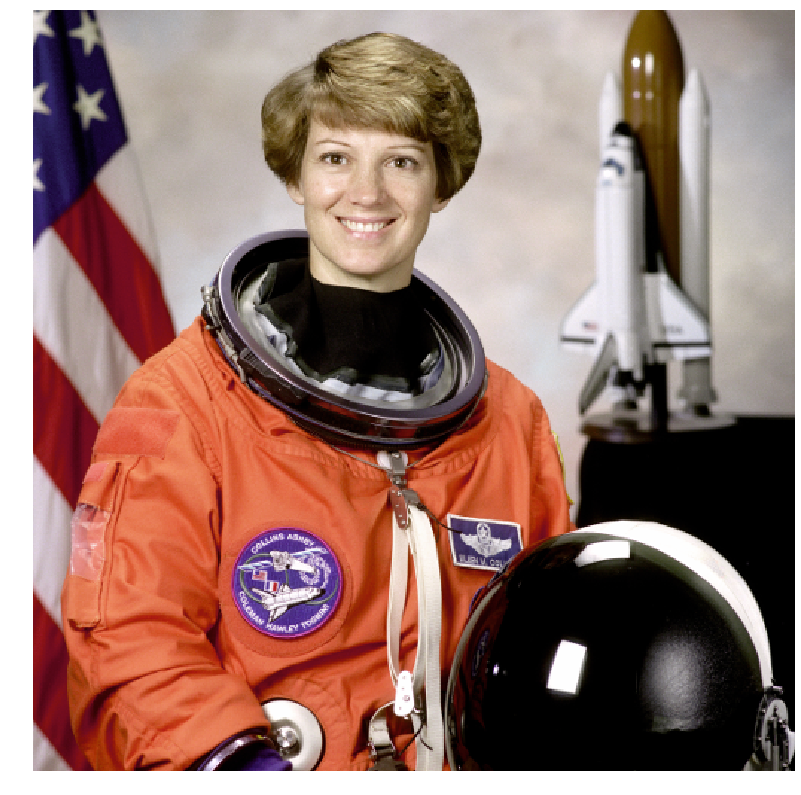

In [32]:
from skimage.measure import compare_ssim as ssim
from skimage import io
from skimage.transform import resize

from skimage import data
from skimage.viewer import ImageViewer
image = data.astronaut()

def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax
  
image_show(image)






Question 2: Use skimage to zoom on the face of the iguana. Display the image.

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf3221bbe0>)

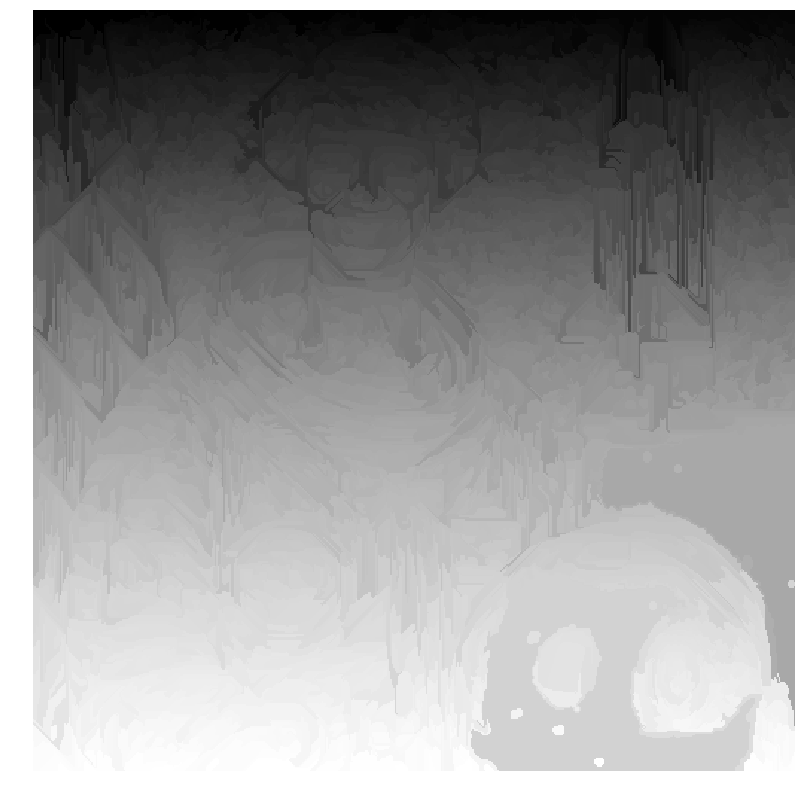

In [33]:
# Zoom image
import skimage.segmentation as seg

image_felzenszwalb = seg.felzenszwalb(image) 
image_show(image_felzenszwalb)

Question 3: Use skimage to rescale the image to 20% of the initial size of the image. Display the image. Rescaling means lowering the resolution of the image. Remember that in class we talked about finding the computation/accuracy trade-off by showing different resolutions of the same image to humans and figuring out what is the minimum resolution leading to the maximum human accuracy.

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


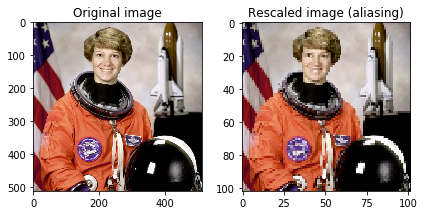

In [30]:
# Rescale image to 25% of the initial size
### START CODE HERE ###
from skimage import data, color
from skimage.transform import rescale

image_rescaled = rescale(image, 0.2, anti_aliasing=False)



fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

plt.tight_layout()
plt.show()
### END CODE HERE ###

Question 4: Use skimage to add random noise to the image. Display the image.

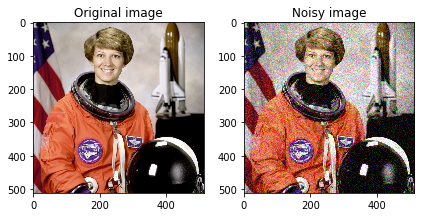

In [35]:
# Add random noise
### START CODE HERE ###
from skimage.util import random_noise

image_noisy = random_noise(image)



fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_noisy, cmap='gray')
ax[1].set_title("Noisy image")

plt.tight_layout()
plt.show()
### END CODE HERE ###

Question 5: Use skimage to rotate the image by 45 degrees.

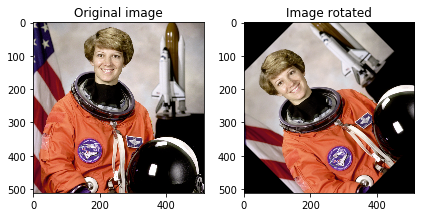

In [40]:
# Rotate
### START CODE HERE ###
from skimage.transform import rotate

image_rotated = rotate(image, 45)



fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rotated, cmap='gray')
ax[1].set_title("Image rotated")

plt.tight_layout()
plt.show()
### END CODE HERE ###

Question 6: Use skimage to flip the image horizontaly and verticaly. Display the image.

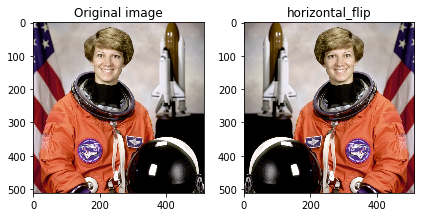

In [42]:
# Horizontal flip
### START CODE HERE ###
horizontal_flip = image[:, ::-1]

fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(horizontal_flip, cmap='gray')
ax[1].set_title("horizontal_flip")

plt.tight_layout()
plt.show()
### END CODE HERE ###

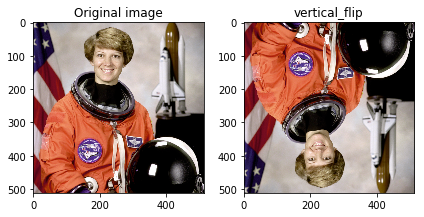

In [43]:
# Vertical flip
### START CODE HERE ###
vertical_flip = image[::-1, :]

fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(vertical_flip, cmap='gray')
ax[1].set_title("vertical_flip")

plt.tight_layout()
plt.show()
### END CODE HERE ###

Question 7: (Optional) Use skimage to (i) blur the image, (ii) enhance its contrast, (iii) convert to grayscale, (iv) invert colors…

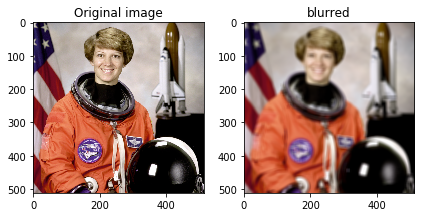

In [44]:
# Blur image
### START CODE HERE ###
from scipy import ndimage

blured_image = ndimage.uniform_filter(image, size=(11, 11, 1))


fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(blured_image, cmap='gray')
ax[1].set_title('blurred')

plt.tight_layout()
plt.show()

### END CODE HERE ###

# Convert to grayscale
### START CODE HERE ###

### END CODE HERE ###

# Enhance contrast
### START CODE HERE ###

### END CODE HERE ###

# Color inversion
### START CODE HERE ###

### END CODE HERE ###

Skimage is a popular package for customized data preprocessing and augmentation. However, deep learning frameworks such as Keras often incorporate functions to help you preprocess data in a few lines of code.

Question 8: Read and run the Keras code for image preprocessing. It will save augmented images in a folder called “preview” on the notebook’s directory.

Image preprocessing in Keras

In [45]:
# Image preprocessing in Keras

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest')

  # this is a PIL image
x = img_to_array(image)  # convert image to numpy array 
x = x.reshape((1,) + x.shape)  # reshape image to (1, ..,..,..) to fit keras' standard shape

# Use flow() to apply data augmentation randomly according to the datagenerator
# and saves the results to the `preview/` directory
num_image_generated = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    num_image_generated += 1
    if num_image_generated > 20:
        break # stop the loop after num_image_generated iterations

FileNotFoundError: ignored

Question 9: (Optional) Train the CNN coded for you in the notebook (See Appendix below) on any of the pictures you created. Evaluate the model.

Part II - Text data preprocessing
Question 1: Go on any static website online. Click right and select “View Page Source”. Copy a complicated part of the html code. Paste it in the notebook in the variable “html_page”.

In [0]:
### START CODE HERE ###
html_txt = """ """
### END CODE HERE ###

print(html_txt)

Question 2: Use BeautifulSoup to parse the html_txt. Print the html_txt.

In [0]:
from bs4 import BeautifulSoup

# Parse the html input
### START CODE HERE ###

### END CODE HERE ###

print(html_txt)

Question 3: Use re to remove meta-characters such as squared brackets and anything between them. Print the html_txt.

In [0]:
import re, string, unicodedata
# Remove meta characters and things between them.
### START CODE HERE ###

### END CODE HERE ###

print(html_txt)

Question 4: Using the Natural Language ToolKit (nltk), separate the text into a list of words.

In [0]:
import nltk
from nltk import word_tokenize, sent_tokenize

# Separate text into words
### START CODE HERE ###

### END CODE HERE ###

Question 5: (Optional) Remove non ASCII characters. Convert to Lower case. Remove punctuation, stopwords, …

In [0]:
### START CODE HERE ###

### END CODE HERE ###

A machine will not be able to read this list strings, you need to build a vocabulary and tokenize your words.

Question 6: Build the vocabulary from the list of words.

In [0]:
# Build Vocabulary
### START CODE HERE ###

### END CODE HERE ###

Question 7: Build word to integer mapping in Python. It should be sorted.

In [0]:
# Build word to integer mapping in Python. It should be sorted.
### START CODE HERE ###

### END CODE HERE ###

Question 8: Tokenize your text.

In [0]:
# Convert list of words into list of tokens using this mapping
### START CODE HERE ###

### END CODE HERE ###

Question 9: Read and run the Keras code for text preprocessing. It uses the Tokenizer Function.

In [0]:
# Preprocess text with Keras for Sentiment classification
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

examples = ['You are amazing!','It is so bad','Congratulations','You suck bro','Awesome dude!']
Y = [1, 0, 1, 0, 1]

# Define Tokenizer
t = Tokenizer()
# Fit Tokenizer on text (Build vocab etc..)
t.fit_on_texts(examples)
# Convert texts to sequences of integers
X = t.texts_to_sequences(examples)
# Pad sequences of integers
X = pad_sequences(X, padding = 'post')

# Get the vocabulary size, useful for the embedding layer.
vocab_size = len(t.word_index) + 1
print(vocab_size)
print(X)

Question 10: (Optional) Train the RNN coded for you in the notebook on the sentiment classification class (with 5 examples). Evaluate the mode.

Appendix: Models and training codes

In [0]:
# CNN
model_CNN = Sequential()
model_CNN.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = image.shape))
model_CNN.add(BatchNormalization(axis = 3, name = 'bn0'))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D((2, 2), name='max_pool'))
model_CNN.add(Flatten())
model_CNN.add(Dense(1, activation='sigmoid', name='fc'))

NameError: ignored

In [0]:
# RNN
model_RNN = Sequential()
model_RNN.add(Embedding(vocab_size, 128))
model_RNN.add(LSTM(128))
model_RNN.add(Dense(1, activation='sigmoid'))

NameError: ignored

In [0]:
# training code for CNN
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_CNN.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_CNN.fit(np.expand_dims(image, axis=0), np.array([1]), epochs=2)

NameError: ignored

In [0]:
# training code for RNN
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_RNN.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_RNN.fit(np.array(X), np.array(Y), epochs=1000)

NameError: ignored

In [0]:
# testing code for CNN
model_CNN.predict(np.expand_dims(image_blured, axis=0))

NameError: ignored